# <center> Tarea 4
    
# <center> Manuel Francisco Martinez Motta
# <center> Manuela Isabella Nobile Russi

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

### Punto 1. Integrador de Beeman 1976

Para llegar al integrador de Beeman, comenzamos con la ecuación de movimiento en dinámica molecular, que es la segunda ley de Newton:

$ m \frac{d^2r}{dt^2} = F $

Descomponemos esta ecuación en dos ecuaciones diferenciales de primer orden usando la velocidad \( v = \frac{dr}{dt} \):

$ \frac{dr}{dt} = v $
$ \frac{dv}{dt} = \frac{F}{m} $

Ahora, al aplicar Beeman, la predicción se realiza utilizando una aproximación de Taylor de segundo orden:

$ r_{n+1}^{(p)} = r_n + h v_n + \frac{h^2}{2} a_n $

Con este, se mejora la posición usando la velocidad en el paso predicho y las aceleraciones en los pasos actual y predicho para llegar al primer paso de corrección de la forma:

$ r_{n+1} = r_n + h v_n + \frac{h^2}{6} \left(4a_n - a_{n-1}\right) $

Finalmente, en el segundo paso de corrección, ajustamos la velocidad utilizando las aceleraciones en los pasos actual y predicho donde queda que:

$ v_{n+1} = v_n + \frac{h}{3} \left(2a_{n+1} + 5a_n - a_{n-1}\right) $

### Punto 2. Integrador de Adams-Bashford

El polinomio interpolador de Lagrange para tres puntos $(t_{n-2}, f_{n-2}), (t_{n-1}, f_{n-1}), (t_{n}, f_{n})$ es:

$ P_2(t) = \frac{(t - t_{n-2})(t - t_{n-1})}{(t_{n} - t_{n-2})(t_{n} - t_{n-1})} \cdot f_{n-2} + \frac{(t - t_{n-2})(t - t_{n})}{(t_{n-1} - t_{n-2})(t_{n-1} - t_{n})} \cdot f_{n-1} + \frac{(t - t_{n-1})(t - t_{n})}{(t_{n-2} - t_{n-1})(t_{n-2} - t_{n})} \cdot f_{n} $

Simplificando, definimos $h = t_{n} - t_{n-1}$ y $\Delta t = t - t_{n}$. Luego, sustituimos $t_{n-2} = t - 2h$, $t_{n-1} = t - h$, y $t_{n} = t$ en $P_2(t)$:

$ P_2(t) = \frac{(\Delta t + 2h)(\Delta t + h)}{2h \cdot h} \cdot f_{n-2} - \frac{(\Delta t + 2h)(\Delta t)}{h \cdot (-h)} \cdot f_{n-1} + \frac{(\Delta t + h)(\Delta t)}{(2h) \cdot h} \cdot f_{n} $

Multiplicamos por $\frac{h}{2}$ para obtener el polinomio interpolador:

$ \frac{h}{2} \cdot P_2(t) = \frac{(\Delta t + 2h)(\Delta t + h)}{4h} \cdot f_{n-2} + \frac{(\Delta t + 2h)(\Delta t)}{-2} \cdot f_{n-1} + \frac{(\Delta t + h)(\Delta t)}{2} \cdot f_{n} $

Integramos $ \frac{h}{2} \cdot P_2(t) $

$ \int_{0}^{h} \frac{h}{2} \cdot P_2(t) \, dt = \int_{0}^{h} \frac{(\Delta t + 2h)(\Delta t + h)}{4} \cdot f_{n-2} + \frac{(\Delta t + 2h)(\Delta t)}{-2} \cdot f_{n-1} + \frac{(\Delta t + h)(\Delta t)}{2} \cdot f_{n} \, dt $

$ \int_{0}^{h} \frac{h}{2} \cdot P_2(t) \, dt = \frac{23}{12}hf_{n} - \frac{16}{12}hf_{n-1} + \frac{5}{12}hf_{n-2} $

Finalmente, multiplicamos por $ \frac{2}{h} $ 

$ y_{n+1} = y_n + \frac{h}{12} \left(23f_{n} - 16f_{n-1} + 5f_{n-2}\right) $

Para el método de cuatro puntos, después de realizar la integración y multiplicar por $ \frac{2}{h} $ obtenemos la fórmula de iteración para el método:

$ y_{n+1} = y_n + \frac{h}{24} \left(55f_{n} - 59f_{n-1} + 37f_{n-2} - 9f_{n-3}\right) $

### Punto 3. Integrador de Adams-Moulton

El polinomio interpolador de Lagrange para tres puntos $((t_{n-1}, f_{n-1}), (t_{n}, f_{n}), (t_{n+1}, f_{n+1}))$ es:

$ P_2(t) = f_{n-1} \cdot \frac{(t - t_{n})(t - t_{n+1})}{(t_{n-1} - t_{n})(t_{n-1} - t_{n+1})} + f_n \cdot \frac{(t - t_{n-1})(t - t_{n+1})}{(t_{n} - t_{n-1})(t_{n} - t_{n+1})} + f_{n+1} \cdot \frac{(t - t_{n-1})(t - t_{n})}{(t_{n+1} - t_{n-1})(t_{n+1} - t_{n})} $

Si definimos $( h = t_{n} - t_{n-1} )$ y $( \Delta t = t - t_{n} )$ podemos sustituir en $P_2(t)$ y entonces:

$ P_2(t) = f_{n-1} \cdot \frac{(\Delta t + h)(\Delta t)}{(-h)(-2h)} + f_n \cdot \frac{(\Delta t - h)(\Delta t)}{(h)(-h)} + f_{n+1} \cdot \frac{(\Delta t - h)(\Delta t + h)}{(2h)(h)} $

Luego, simplificamos los términos:

$ P_2(t) = \frac{1}{2h} \left[ -f_{n-1} (\Delta t + h) (\Delta t) + 2f_n (\Delta t - h) (\Delta t) + f_{n+1} (\Delta t - h) (\Delta t + h) \right] $


$ 2h \cdot P_2(t) = -f_{n-1} (\Delta t + h) (\Delta t) + 2f_n (\Delta t - h) (\Delta t) + f_{n+1} (\Delta t - h) (\Delta t + h) $

Luego, integramos $2h \cdot P_2(t)$ con respecto a $\Delta t$ 

$ \int_{0}^{h} 2h \cdot P_2(t) \, dt = \int_{0}^{h} -f_{n-1} (\Delta t + h) (\Delta t) + 2f_n (\Delta t - h) (\Delta t) + f_{n+1} (\Delta t - h) (\Delta t + h) \, dt $


$ \int_{0}^{h} 2h \cdot P_2(t) \, dt = -\frac{h}{3}f_{n-1} + \frac{4h}{3}f_n + \frac{h}{3}f_{n+1} $

Finalmente, multiplicamos la ecuación por $\frac{1}{h}$

$ y_{n+1} = y_n + \frac{h}{12} \left(5f_{n+1} + 8f_n - f_{n-1}\right) $

Para la ecuación con cuatro puntos tenemos un procedimiento similar en donde tenemos que

$ \int_{0}^{h} 2h \cdot P_3(t) \, dt = \int_{0}^{h} \frac{-11}{24}f_{n-2} + \frac{19}{24}f_{n-1} - \frac{5}{24}f_n + \frac{1}{24}f_{n+1} \, dt $

Luego

$ \int_{0}^{h} 2h \cdot P_3(t) \, dt = -\frac{11h}{24}f_{n-2} + \frac{19h}{24}f_{n-1} - \frac{5h}{24}f_n + \frac{h}{24}f_{n+1} $

Finalmente,

$ y_{n+1} = y_n + \frac{h}{24} \left(9f_{n+1} + 19f_n - 5f_{n-1} + f_{n-2}\right) $


### Punto 4. Integrador simplético I

Tenemos las ecuaciones

$ x_{n+1} = x_n + h \cdot v_n + \frac{h^2}{2} \cdot a_n $

$ v_{n+1} = v_n + \frac{h}{2} \cdot (a_n + a_{n+1}) $

Ahora, definimos $\Delta x = x_{n+1} - x_n $ y $\Delta v = v_{n+1} - v_n$.

Luego,

$ \frac{\partial x_{n+1}}{\partial x_n} = 1 $, 
$ \frac{\partial v_{n+1}}{\partial x_n} = 0 $, 
$ \frac{\partial x_{n+1}}{\partial v_n} = h $, 
$ \frac{\partial v_{n+1}}{\partial v_n} = 1 + \frac{h}{2} \cdot \frac{\partial a_{n+1}}{\partial v_n} $

Ahora, evaluamos el Jacobiano \( J \):

$ J = \frac{\partial x_{n+1}}{\partial x_n} \cdot \frac{\partial v_{n+1}}{\partial v_n} - \frac{\partial x_{n+1}}{\partial v_n} \cdot \frac{\partial v_{n+1}}{\partial x_n} $

Sustituimos las derivadas parciales obtenidas:

$ J = (1) \cdot \left(1 + \frac{h}{2} \cdot \frac{\partial a_{n+1}}{\partial v_n}\right) - (h) \cdot (0) $

$ J = 1 + \frac{h}{2} \cdot \frac{\partial a_{n+1}}{\partial v_n} $

Para que J sea igual a uno, necesitamos que $\frac{\partial a_{n+1}}{\partial v_n} = 0$. Si tenemos que la aceleración a no depende explícitamente de la velocidad v, y por lo tanto, $\frac{\partial a}{\partial v} = 0$. Esto implica que $J = 1$, y por lo tanto, el método de Verlet es simpléctico.

### Punto 5. Integrador simpléctico II

In [2]:
# Parámetros
omega = 1.0
t_max = 10.0
h = 0.01

In [3]:
# Función del oscilador armónico
def GetA(r):
    return -omega**2 * r

In [4]:
# Método de Leap-Frog (Orden 2)
def LeapFrog(f, x0, t, omega):
    h = t[1] - t[0]

    x = np.zeros_like(t)
    v = np.zeros_like(t)

    x[0] = x0[0]
    v[0] = x0[1]

    for i in range(1, len(t)):
        vhalf = v[i - 1] + 0.5 * h * f(x[i - 1])

        x[i] = x[i - 1] + h * vhalf

        v[i] = vhalf + 0.5 * h * f(x[i])

    return x, v

In [5]:
# Coeficientes para el método simpléctico
w0 = - ( 2.**(1./3.))/(2. - 2.**(1./3.))
w1 =  ( 1. )/( 2. - 2.**(1./3.))
c1 = w1/2.
c2 = (w0 + w1)/2.
c3 = c2
c4 = c1
d1 = w1
d2 = w0
d3 = d1

# Método simpléctico de orden 4
def GetSimplecticAlgorithm(f, r0, v0, t):
    h = t[1] - t[0]

    r = np.zeros((len(t), 2))
    v = np.zeros_like(r)

    r[0] = r0
    v[0] = v0

    for i in range(1, len(t)):
        r1 = r[i - 1] + c1 * v[i - 1] * h
        v1 = v[i - 1] + d1 * h * f(r1)

        r2 = r1 + c2 * v1 * h
        v2 = v1 + d2 * h * f(r2)

        r3 = r2 + c3 * v2 * h
        v3 = v2 + d3 * h * f(r3)

        r[i] = r3 + c4 * v3 * h
        v[i] = v3

    r = r[::10]
    v = v[::10]
    t = t[::10]

    return r, v, t

In [6]:
# Definición del tiempo
t = np.linspace(0, t_max, int(t_max / h))

# Condiciones iniciales
r0 = np.array([1.0, 0.0])
v0 = np.array([0.0, 1.0])

# Obtener soluciones con ambos métodos
x_leapfrog, v_leapfrog = LeapFrog(GetA, r0, t, omega)
r_simplectic, v_simplectic, t_simplectic = GetSimplecticAlgorithm(GetA, r0, v0, t)

# Calcular energía total para ambos métodos
energy_leapfrog = 0.5 * np.array(v_leapfrog)**2 + 0.5 * np.array(x_leapfrog)**2
energy_simplectic = 0.5 * np.array(v_simplectic[:, 0])**2 + 0.5 * np.array(r_simplectic[:, 0])**2

<IPython.core.display.Javascript object>


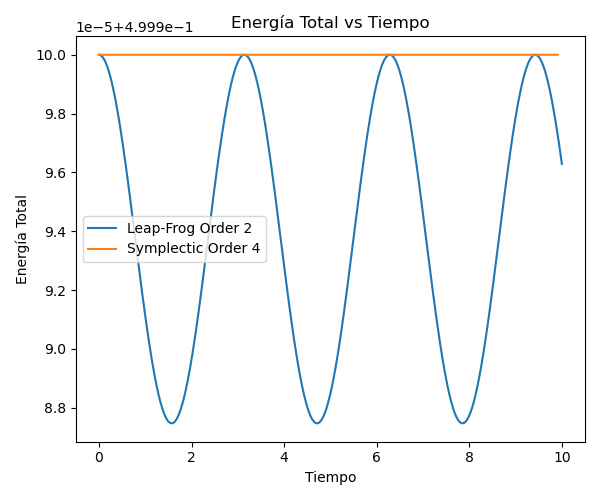

In [7]:
# Gráficos
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)

ax.plot(t, energy_leapfrog, label='Leap-Frog Order 2')
ax.plot(t_simplectic, energy_simplectic, label='Symplectic Order 4')
ax.set_title('Energía Total vs Tiempo')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Energía Total')
ax.legend()

plt.tight_layout()
plt.show()

### Punto 6. Numerical quantum mechanics

#### a.

Tenemos la ecuación de Schrödinger

$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E\psi $

Expresamos la función de onda $\psi$ y la función $R(x, E, V)$ en series de Taylor alrededor de un punto $x_n$:

$ \psi_{n+1} = \psi_n + h \psi'_n + \frac{h^2}{2} \psi''_n + \frac{h^3}{6} \psi'''_n + O(h^4) $

$ R_{n} = R(x_n, E, V) = R_n + h R'_n + \frac{h^2}{2} R''_n + \frac{h^3}{6} R'''_n + O(h^4) $

Usamos las expresiones de las primeras y segundas derivadas de $\psi$ en términos de las diferencias finitas centradas:

$ \psi'_n = \frac{\psi_{n+1} - \psi_{n-1}}{2h} + O(h^2) $

$ \psi''_n = \frac{\psi_{n+1} - 2\psi_n + \psi_{n-1}}{h^2} + O(h^2) $

Sustituimos las expansiones y las aproximaciones de las derivadas en la ecuación de Schrödinger:

$ -\frac{\hbar^2}{2m} \frac{\psi_{n+1} - 2\psi_n + \psi_{n-1}}{h^2} + V_n \psi_n = E \psi_n $

$ \frac{\psi_{n+1} - 2\psi_n + \psi_{n-1}}{h^2} + R_n \psi_n = 0 $

$ \psi_{n+1} - 2\psi_n + \psi_{n-1} + h^2 R_n \psi_n = 0 $

Definimos los coeficientes $a_{n+1}$, $a_n$, y $a_{n-1}$:

$ a_{n+1} = 1 - \frac{h^2}{12} R_{n+1} $

$ a_n = 1 - \frac{h^2}{12} R_n $

$ a_{n-1} = 1 - \frac{h^2}{12} R_{n-1} $

Finalmente,

$ \psi_{n+1} = \frac{2a_n \psi_n - a_{n-1} \psi_{n-1}}{a_{n+1}} $

#### b.

Para esta ecuación (teniendo en cuenta que $\hbar,m,\omega = 1$) las funciones son:

$R_n = x_n^2 - 2E$ 

$S_n = 0.$

#### c.

In [8]:
N = 1000
x = np.linspace(-5,5,N)
h = x[1]-x[0]

#### d. 

In [9]:
def V_harmonic(x):
    return 0.5*x**2

#### e, f, g y h.

In [10]:
def R(x,E,V):
    return 2*(V(x)-E)

def Numerov(space,E,V):
    psi = np.zeros_like(space)
    psi[0] = 0
    psi[1] = 1e-5
    
    for i in range(len(space)-1):
        akp1 = 1-h**2/12 * R(space[i+1],E,V)
        akm1 = 1-h**2/12 * R(space[i-1],E,V)
        ak = 1+5*h**2/12 * R(space[i],E,V)
        if i >= 2:
            psi[i+1] = (2*ak*psi[i] - akm1*psi[i-1])/akp1
    return psi


def EigenEnergy(space,e,step,V):
    dE = 0.1
    listE = []
    E = e
    while len(listE) < 6:
        psik = Numerov(space,E,V)[-1]
        psik1 = Numerov(space,E+dE,V)[-1]
        if psik1*psik < 0:
            listE.append(E)
        E = E+dE
    return listE


E_ = EigenEnergy(x,0,0.001,V_harmonic)
Psi = [0]*len(E_)

for i in range(len(E_)):
    Psi[i] = Numerov(x,E_[i],V_harmonic)


def Normalize(psi):
    sqrd_psi = psi**2
    a = 1/np.sqrt(sci.integrate.simps(sqrd_psi))
    return a

<IPython.core.display.Javascript object>


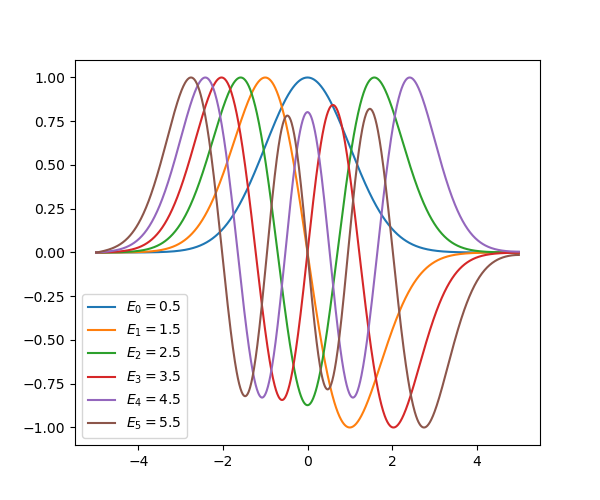

In [11]:
for i in range(len(Psi)):
    Psi[i] = -Psi[i]/max(-Psi[i])

fig1 = plt.figure(figsize = (6, 5))
ax1 = fig1.add_subplot(111)
for i in range(len(E_)):
    ax1.plot(x,Psi[i],label=r"$E_{%s} = %s$"%(i,round(E_[i],3)))
plt.legend()

#### i.

In [12]:
def EigenEnergy(space,e,step,V,n):
    E_list = []
    Energies = np.arange(e,0,1e-2)

    for i, E in enumerate(Energies[:len(Energies)-2]):
        psik = Numerov(space,Energies[i],V)[-1]
        psikp1 = Numerov(space,Energies[i+1],V)[-1]
        
        if psik*psikp1 < 0:
            interval_E = np.linspace(Energies[i-1],Energies[i+1],int(1e2))
            statement = False
            
            for j in range(len(interval_E[:-2])):
                if Numerov(space,interval_E[j],V)[-1]*Numerov(space,interval_E[j+1],V)[-1] < 0:
                    print("Valor propio de energía:",interval_E[j],Numerov(space,interval_E[j],V)[-1])
                    E_list.append(interval_E[j])
                    statement = True
                if statement:
                    continue
                    
        if len(E_list) == 5:
            break
    return E_list       

In [13]:
def V_gaussian(x):
    return -10*np.exp(-x**2/20)

E_gauss = EigenEnergy(x,-10,-0.0001,V_gaussian,2)
Psi_gauss = [0]*len(E_gauss)

Valor propio de energía: -9.50949494949496 -10.782039475117468
Valor propio de energía: -8.547474747474778 0.1811477922606678
Valor propio de energía: -7.624444444444495 -0.014050813346405575
Valor propio de energía: -6.7412121212121905 0.0008960327605506087
Valor propio de energía: -5.8984848484849355 -5.8905016446620635e-05


<IPython.core.display.Javascript object>


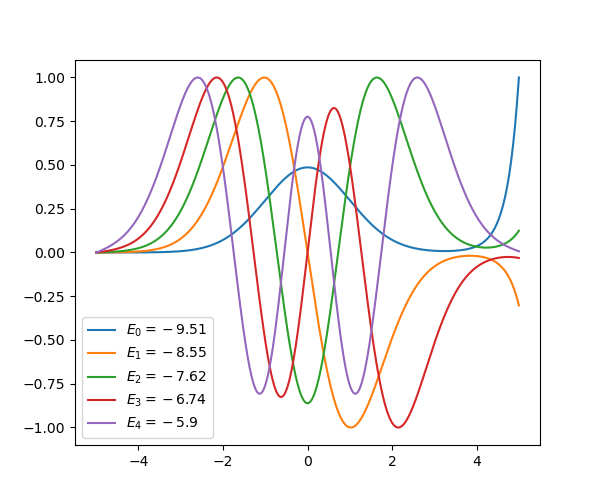

In [14]:
for i in range(len(E_gauss)):
    Psi_gauss[i] = Numerov(x,E_gauss[i],V_gaussian)
for k in range(len(Psi_gauss)):
    Psi_gauss[k] = -Psi_gauss[k]/max(-Psi_gauss[k])
    
fig2 = plt.figure(figsize = (6, 5))
ax2 = fig2.add_subplot(111)
for i in range(len(E_gauss)):
    ax2.plot(x,Psi_gauss[i],label=r"$E_{%s} = %s$"%(i,round(E_gauss[i],2)))
plt.legend()

#### j.

In [15]:
def V_sqrd(x):
    return -4/(1+x**2)**2

E_sqrt = EigenEnergy(x,-3,-0.0001,V_sqrd,2)
Psi_sqrt = [0]*len(E_sqrt)

Valor propio de energía: -2.4714141414141526 -2.8497092493671525
Valor propio de energía: -0.4256565656566205 6.589862709948567e-05


<IPython.core.display.Javascript object>


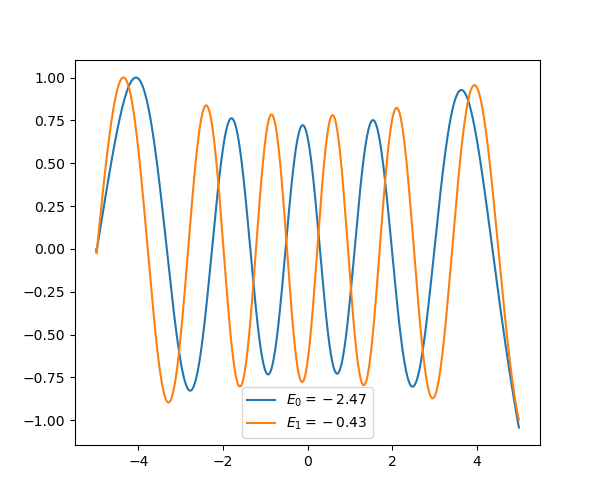

In [16]:
for i in range(len(E_sqrt)):
    Psi_sqrt[i] = Numerov(x,E_sqrt[i],V_gaussian)
for k in range(len(Psi_sqrt)):
    Psi_sqrt[k] = -Psi_sqrt[k]/max(-Psi_sqrt[k])
    
fig3 = plt.figure(figsize = (6, 5))
ax3 = fig3.add_subplot(111) 
for i in range(len(E_sqrt)):
    ax3.plot(x,Psi_sqrt[i],label=r"$E_{%s} = %s$"%(i,round(E_sqrt[i],2)))
plt.legend()